In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
X=df.drop("Class",axis=1)
Y=df['Class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
#!pip install imblearn

In [10]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [11]:
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [12]:
ros=RandomOverSampler()

In [13]:
X_train,Y_train = ros.fit_resample(X_train,Y_train)

In [14]:
pd.Series(Y_train).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [15]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [16]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('confusion matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [17]:
lr=LogisticRegression()

In [18]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.90      0.13       135

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

confusion matrix
[[83713  1595]
 [   14   121]]


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt= DecisionTreeClassifier()

In [21]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.76      0.67      0.72       135

    accuracy                           1.00     85443
   macro avg       0.88      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85280    28]
 [   44    91]]


In [22]:
dt.feature_importances_

array([1.42052805e-02, 1.20336382e-04, 1.85825899e-03, 1.02856635e-03,
       4.40389355e-02, 7.59918809e-03, 2.25788505e-03, 1.29715312e-02,
       1.07510998e-02, 5.30922299e-03, 3.88436015e-02, 1.93959389e-03,
       2.51870452e-02, 1.56572010e-02, 7.40780144e-01, 4.01560923e-05,
       1.25998752e-03, 6.39564449e-03, 2.57528902e-03, 1.06557302e-02,
       1.76712604e-02, 1.77100908e-03, 5.46026387e-03, 6.03777237e-03,
       1.48541955e-04, 4.67118453e-04, 5.53542018e-03, 5.00452297e-03,
       4.26284441e-03, 1.01665486e-02])

In [23]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

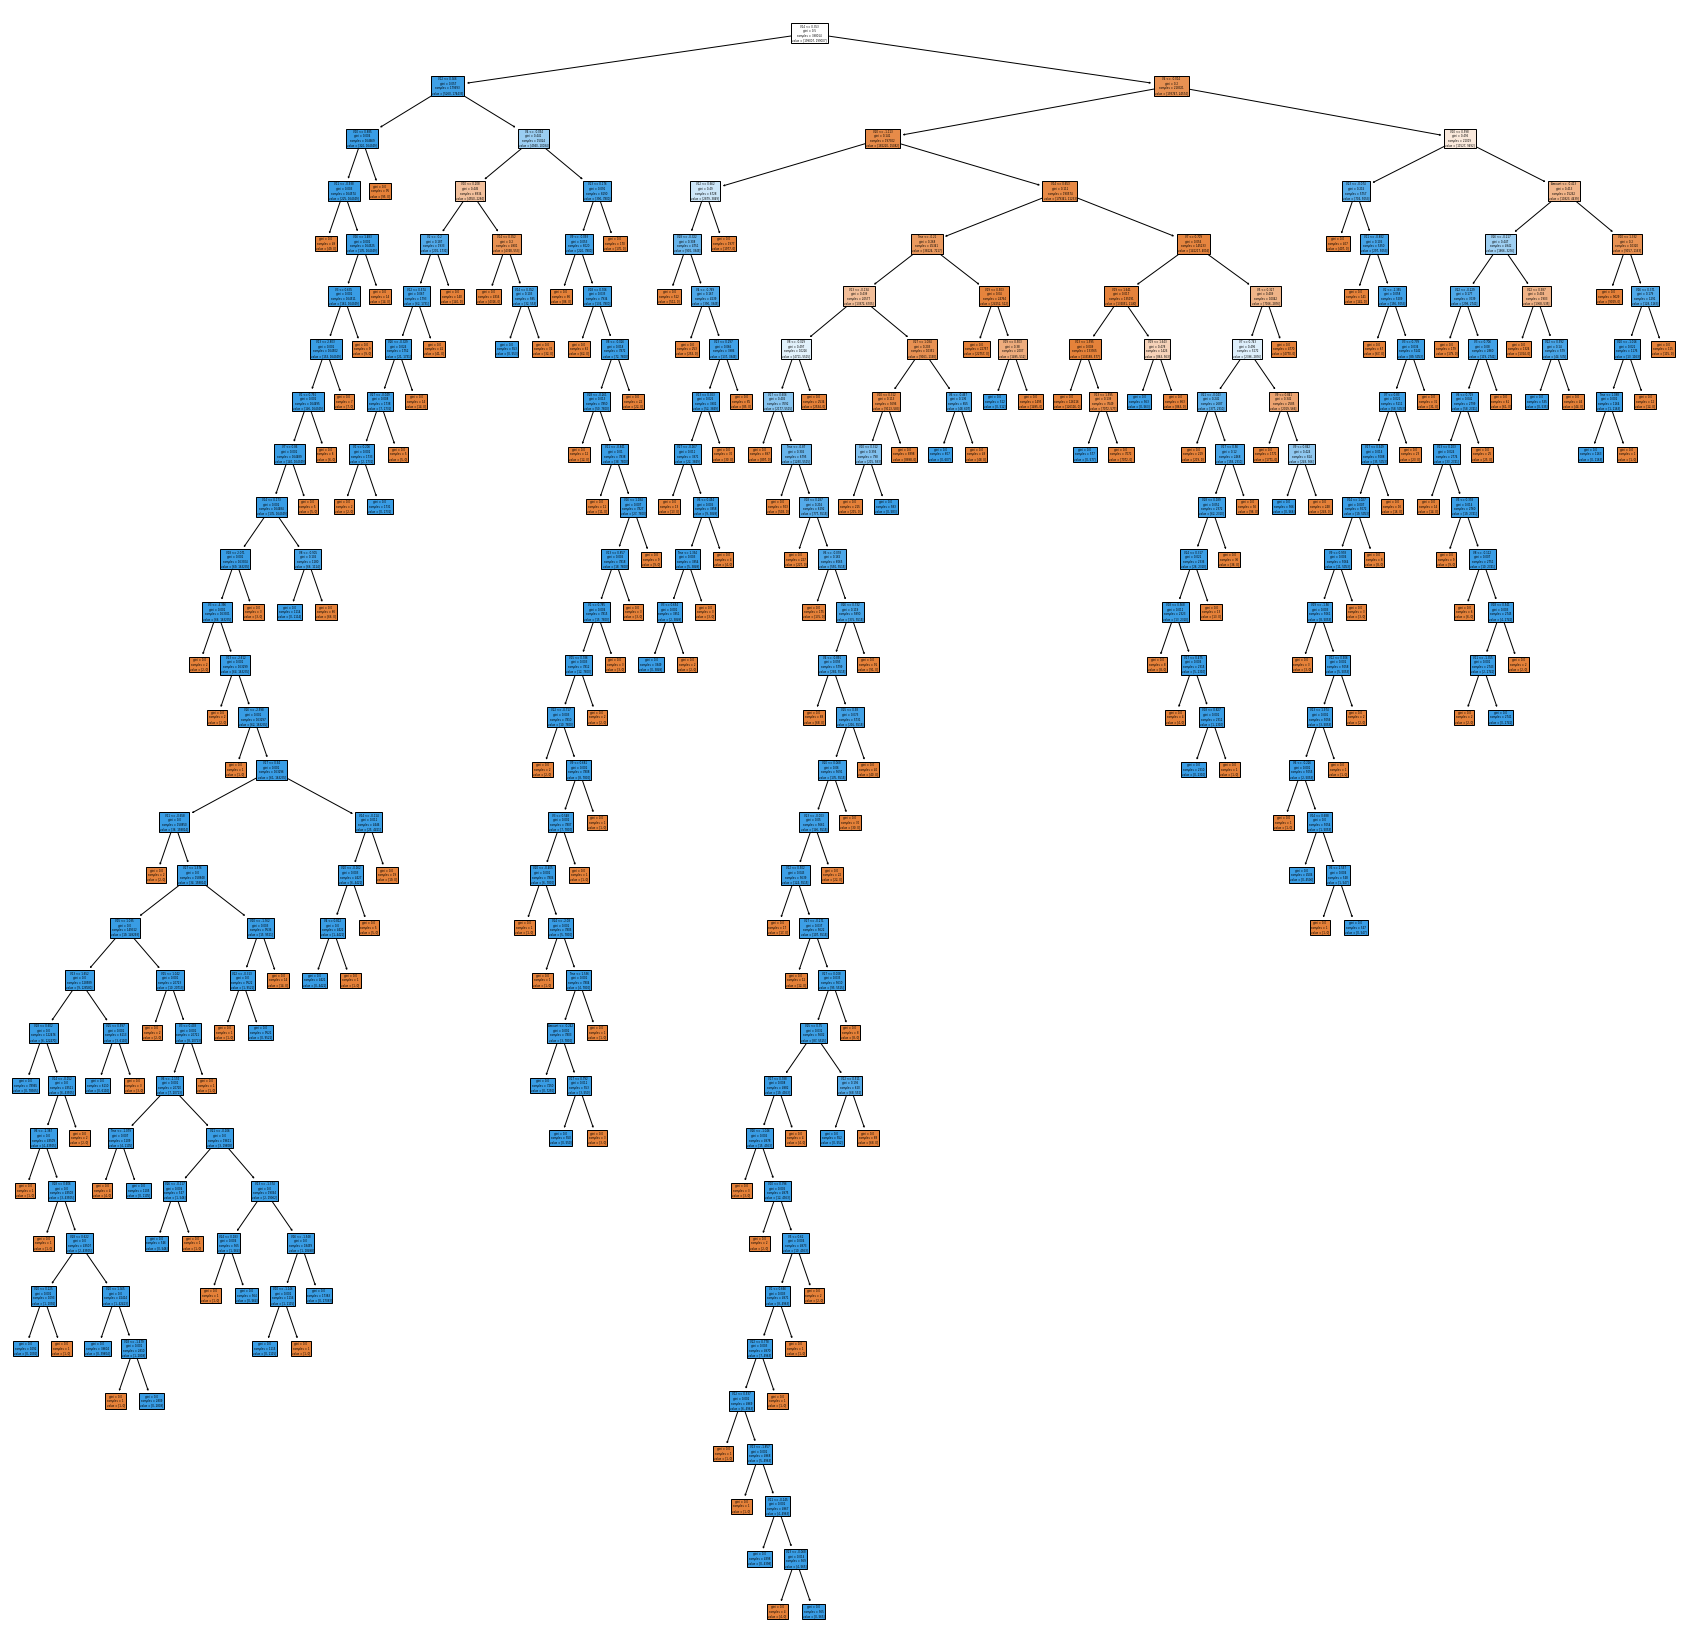

In [24]:
from sklearn import tree

features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)


In [25]:
#But we got less score 0.73 % its good but not excellent , 
#reason behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter
#leaf means no child
dt1=DecisionTreeClassifier(max_depth=5)
#can be less than 8 but not more than 8
#by default use method :gini index

In [26]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.16      0.83      0.27       135

    accuracy                           0.99     85443
   macro avg       0.58      0.91      0.63     85443
weighted avg       1.00      0.99      1.00     85443

confusion matrix
[[84721   587]
 [   23   112]]


In [27]:
dt1.feature_importances_

array([1.16761179e-02, 0.00000000e+00, 1.35021045e-03, 0.00000000e+00,
       4.57039837e-02, 0.00000000e+00, 0.00000000e+00, 8.05699630e-03,
       0.00000000e+00, 9.17302401e-04, 3.68151614e-02, 1.98641411e-03,
       2.66310590e-02, 0.00000000e+00, 8.21579625e-01, 0.00000000e+00,
       1.55857162e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.90892026e-02, 0.00000000e+00, 0.00000000e+00, 5.52046201e-03,
       0.00000000e+00, 0.00000000e+00, 5.03118777e-03, 0.00000000e+00,
       4.20154263e-03, 1.12848773e-02])

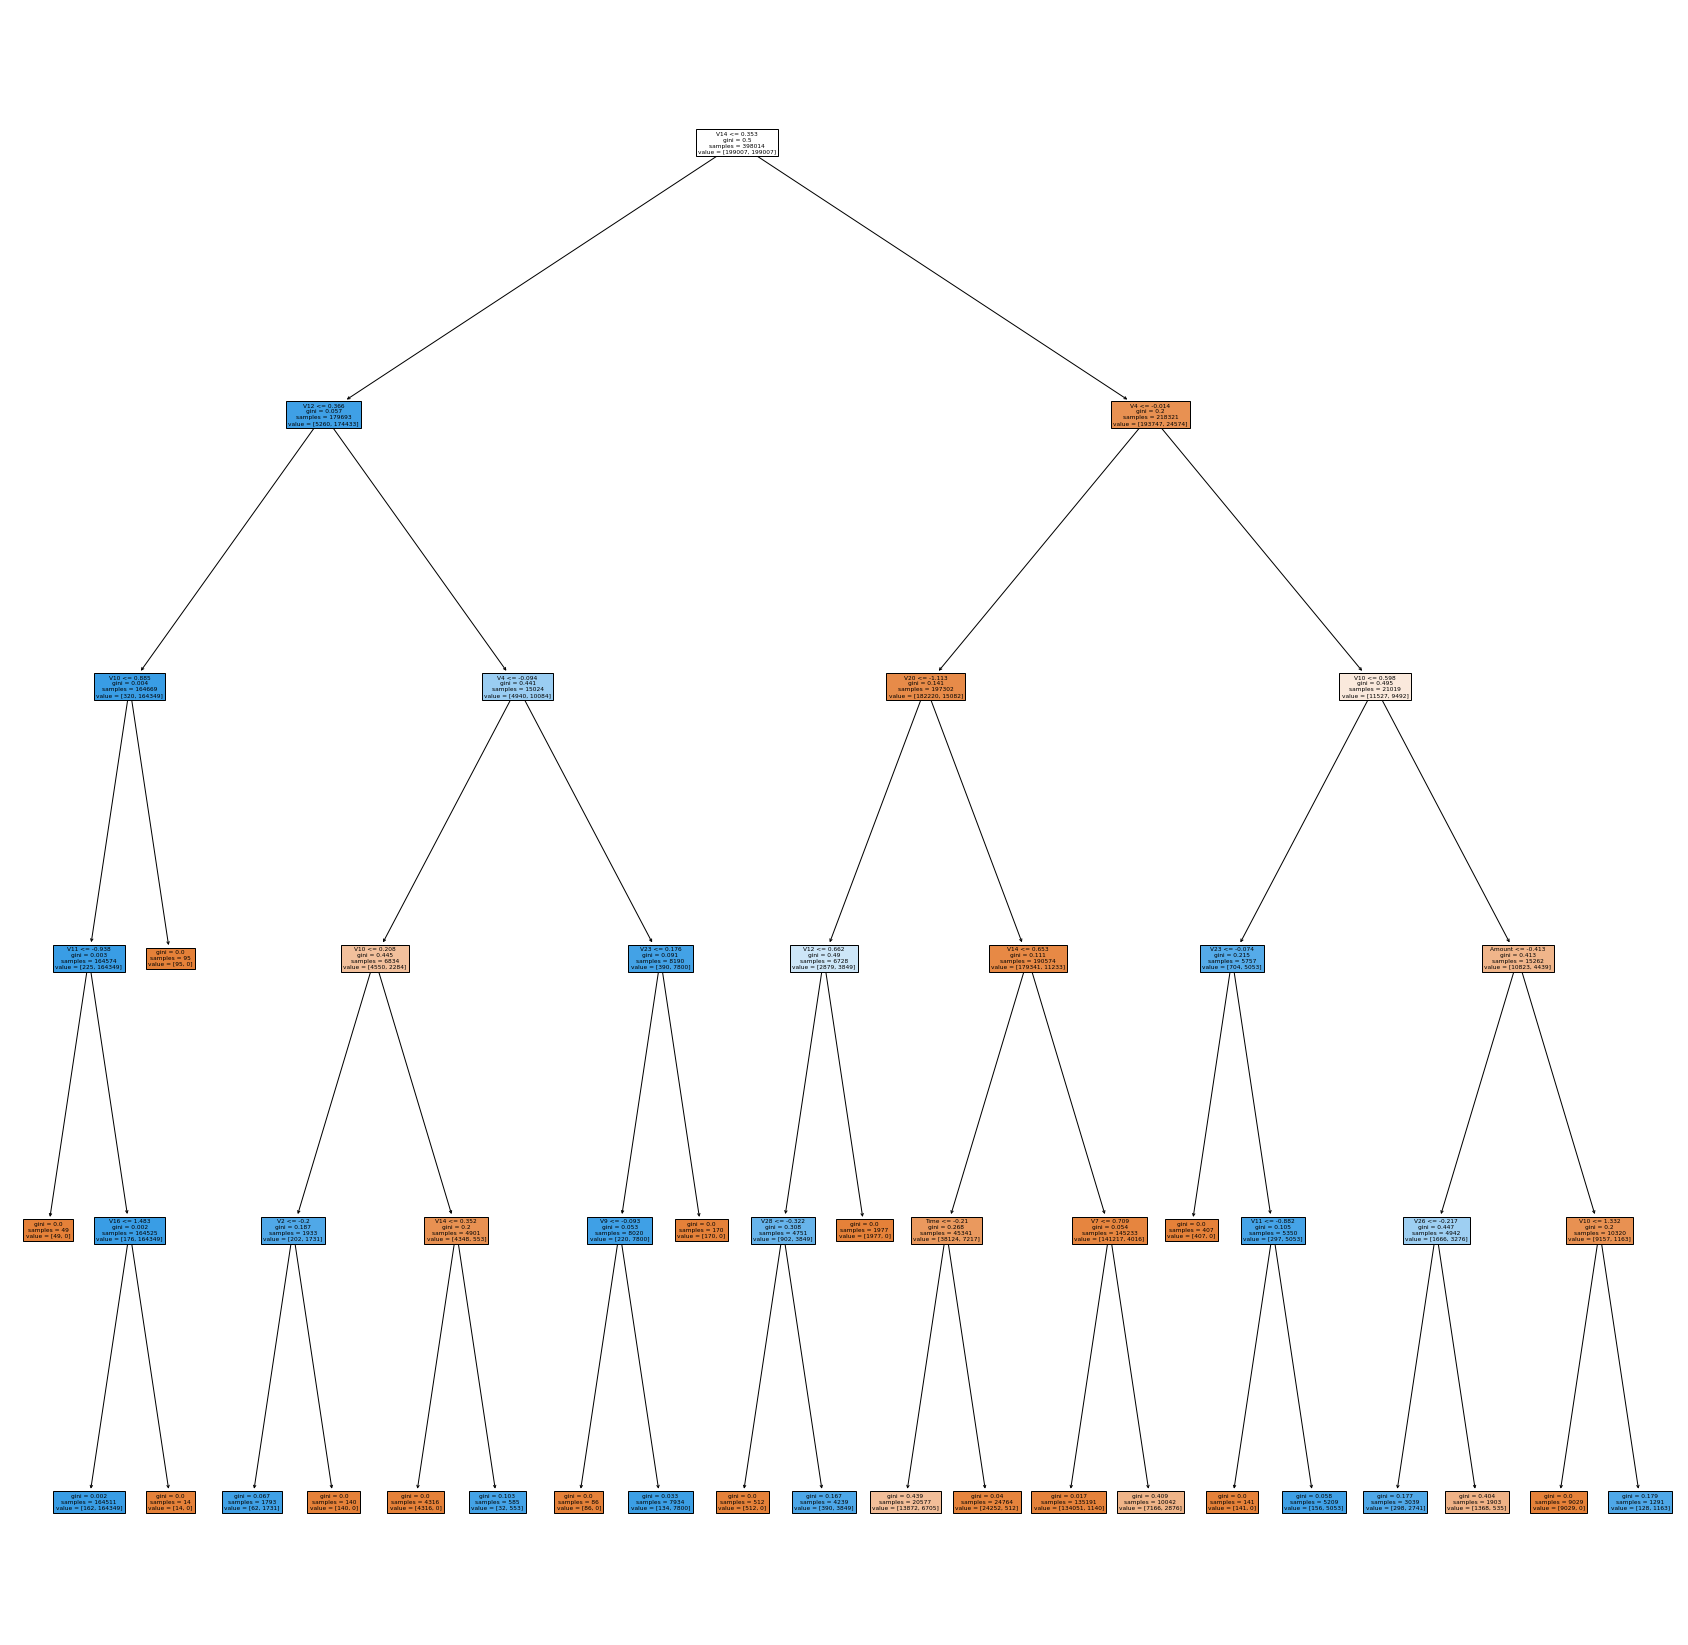

In [28]:
from sklearn import tree

features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [29]:
#2nd purning technique : min_samples_leaf
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50

In [30]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.31      0.81      0.45       135

    accuracy                           1.00     85443
   macro avg       0.65      0.91      0.72     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85062   246]
 [   25   110]]


In [31]:
dt2.feature_importances_

array([1.47395720e-02, 2.99239984e-06, 3.08140859e-03, 5.78120805e-04,
       4.42427984e-02, 7.52950194e-03, 1.50457187e-03, 1.27550140e-02,
       9.89426665e-03, 5.29432657e-03, 3.95219079e-02, 1.30804439e-03,
       2.50231889e-02, 1.57227149e-02, 7.43823205e-01, 2.97657124e-06,
       1.04162535e-03, 6.19488945e-03, 2.31978159e-03, 1.06763829e-02,
       1.73164703e-02, 2.33734324e-03, 5.03547044e-03, 5.81482338e-03,
       1.22051187e-08, 1.35647003e-04, 5.39862418e-03, 4.65292316e-03,
       3.80341144e-03, 1.02479845e-02])

In [32]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))

##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [33]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.35      0.80      0.48       135

    accuracy                           1.00     85443
   macro avg       0.67      0.90      0.74     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85105   203]
 [   27   108]]


In [34]:
#note:- DecisionTreeClassifier witrn min_samples_leaf and gini index

In [35]:
#will be using hard voting
from sklearn.ensemble import VotingClassifier


In [36]:
model_list=[('logistic',lr),('DecisionTree_Gini',dt1),('DecisionTree_entropy',dt2)]

In [37]:
#create a object of VotingClassifier and passing the parameters model_list
vc= VotingClassifier(estimators=model_list)

In [38]:
#call function 
vc=create_model(vc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.30      0.83      0.44       135

    accuracy                           1.00     85443
   macro avg       0.65      0.91      0.72     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85049   259]
 [   23   112]]


In [39]:
vc1= VotingClassifier(estimators=model_list,voting='soft')

In [40]:
vc1=create_model(vc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.30      0.83      0.44       135

    accuracy                           1.00     85443
   macro avg       0.65      0.91      0.72     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85044   264]
 [   23   112]]


In [41]:
'''Difference between Bagging and pasting classifier : - 
In bagging classifier ,  the model is train with different samples with 
replacement .
while other hand  in pasting , the model is train with different samples 
without replacement
'''

'Difference between Bagging and pasting classifier : - \nIn bagging classifier ,  the model is train with different samples with \nreplacement .\nwhile other hand  in pasting , the model is train with different samples \nwithout replacement\n'

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=28480,random_state=1)
#no. of logistic regression : n_estimators=10  and max_samples=28480
#no. of records =10*=28480 records

In [44]:
bc=create_model(bc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.90      0.13       135

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

confusion matrix
[[83714  1594]
 [   14   121]]


In [45]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=28480,random_state=1,bootstrap=False)

In [46]:
bc1=create_model(bc1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.90      0.13       135

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

confusion matrix
[[83741  1567]
 [   14   121]]


In [47]:
#RandomForest
#Here we use object of Bagging Classifier
bc2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=28480,random_state=1)

In [48]:
bc2=create_model(bc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.58      0.79      0.67       135

    accuracy                           1.00     85443
   macro avg       0.79      0.90      0.84     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85231    77]
 [   28   107]]


In [49]:
#Always take Decision tree classifier 
#We can also create the random forest class 
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfs=RandomForestClassifier(n_estimators=10,max_features=22,random_state=1) 
#It is going bagging cause by default the value of bootsrap is True

In [51]:
rfs=create_model(rfs)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.86      0.76      0.80       135

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85291    17]
 [   33   102]]


In [52]:
rfs.feature_importances_

array([0.01141008, 0.00224869, 0.00172456, 0.00182093, 0.04740173,
       0.00393698, 0.00435933, 0.00863327, 0.0073074 , 0.00143629,
       0.08929892, 0.00502825, 0.14878434, 0.01522954, 0.55224941,
       0.00461932, 0.00362302, 0.00364262, 0.00150432, 0.00834172,
       0.02427635, 0.00464131, 0.00342973, 0.00602202, 0.00146622,
       0.00378477, 0.01018695, 0.00259565, 0.00619508, 0.01480119])

In [53]:
# StackingClssifier inbuilt class which defined in inbuilt package mlxtend.classifier
# call StackingClassifier 
from mlxtend.classifier import StackingClassifier

In [54]:
meta = LogisticRegression()

In [55]:
model_list=[lr,dt1,dt2]

In [56]:
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [57]:
sc=create_model(sc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.32      0.81      0.45       135

    accuracy                           1.00     85443
   macro avg       0.66      0.91      0.73     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85069   239]
 [   25   110]]


In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:

ada=AdaBoostClassifier(n_estimators=95) 

In [60]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.16      0.86      0.27       135

    accuracy                           0.99     85443
   macro avg       0.58      0.93      0.63     85443
weighted avg       1.00      0.99      1.00     85443

confusion matrix
[[84689   619]
 [   19   116]]


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:

gbc = GradientBoostingClassifier(n_estimators=75)   # not >= 100

In [63]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.17      0.85      0.28       135

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.64     85443
weighted avg       1.00      0.99      1.00     85443

confusion matrix
[[84746   562]
 [   20   115]]


In [64]:
from xgboost import XGBClassifier 

In [65]:
xgc = XGBClassifier(n_estimators = 75 ,reg_alpha=1)

In [66]:
xgc=create_model(xgc)

[21:16:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.88      0.79      0.83       135

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[85294    14]
 [   29   106]]


In [67]:
# third Algorithm of classification : 
# SVM : Support Vector Machine
from sklearn.svm import LinearSVC   

In [68]:
svc = LinearSVC(random_state=1)              

In [69]:
svc = create_model(svc)  # by default hard margin means no add any error 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.08      0.88      0.14       135

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

confusion matrix
[[83900  1408]
 [   16   119]]


In [70]:
#score not bad but still we try to make the model better as possible 
#Apply soft margin means add externally error on training time
#create the object of inbuilt class LinearSVC  and passing parameter C
#for error
svc1 = LinearSVC(random_state=1,C=0.6)   # range of C = 0.1 - 0.9
# soft margin means to reduced overfitting situation and remove outlier
# c is parameter which is used to add error on training time

In [71]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.08      0.88      0.14       135

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

confusion matrix
[[83919  1389]
 [   16   119]]


In [72]:
#Here if add external error on runtime but no changes in score means no 
#effect on score
#means we have data is non-linear data  , not linear dataset 
#So we will use polynomial kernel function means increase the dimension means
#to converts low dimension data into high dimension means if plot 1D then
#converting into 2D dimension and so on .

In [73]:
# 2. polynomial kernal function of SVM so , use inbuilt class SVC

from sklearn.svm import SVC
#SVC inbuilt class for non-linear data

In [74]:
# create the object of SVC class
poly_svc = SVC(random_state=1,kernel="poly")

In [75]:
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.22      0.82      0.34       135

    accuracy                           1.00     85443
   macro avg       0.61      0.91      0.67     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix
[[84906   402]
 [   24   111]]


In [76]:
# create the object of SVC class
r_svc = SVC(random_state=1,kernel='rbf')
# rbf means radial basis function

In [77]:
r_svc = create_model(r_svc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.17      0.76      0.28       135

    accuracy                           0.99     85443
   macro avg       0.59      0.88      0.64     85443
weighted avg       1.00      0.99      1.00     85443

confusion matrix
[[84808   500]
 [   32   103]]


Note:- Applied all the algorithms of classification method came to the conclusion that the model of logistic regression was the best as the score from Logistic was 90% which is actually a very good score.
Also used auto mL for final decision as data is huge machine learning not always support in that case we use deep learning. 

    